In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [51]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [22]:
unscaled = pd.read_csv('../Data/20%_Loans_12_feat_unscaled.csv')
unscaled.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,loan_status_bin,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,10400.0,22.45,289.91,104433.0,25.37,695.0,1.0,0.0,1,2,4,0,1,0,0,1,0,0,0,0
1,24250.0,24.24,701.01,75000.0,20.84,660.0,0.0,0.0,1,2,5,1,0,0,0,1,0,0,0,0
2,15850.0,23.13,448.01,45000.0,34.85,755.0,1.0,0.0,1,2,11,1,0,0,0,0,0,0,1,0
3,23100.0,20.50,618.46,110000.0,20.43,660.0,0.0,0.0,1,1,3,1,0,0,0,0,0,0,1,0
4,35000.0,20.50,937.06,120000.0,35.69,700.0,1.0,0.0,1,1,9,0,1,0,0,1,0,0,0,0


In [23]:
unscaled.shape

(110074, 20)

In [79]:
verified_unscaled = pd.read_csv('../Data/20%_Loans_12_feat_unscaled_verified.csv')
verified_unscaled.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,loan_status_bin,pub_rec,term,grade,emp_length,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,10400.0,22.45,289.91,104433.0,25.37,695.0,1.0,0.0,1,2,4,0,1,0,0,0,0
1,35000.0,20.50,937.06,120000.0,35.69,700.0,1.0,0.0,1,1,9,0,1,0,0,0,0
2,25825.0,26.06,774.14,68000.0,31.68,675.0,0.0,0.0,1,2,7,0,0,0,0,0,1
3,24575.0,22.45,685.04,92000.0,24.16,725.0,1.0,0.0,1,2,11,0,1,0,0,0,0
4,16925.0,21.48,462.46,47000.0,22.09,680.0,0.0,1.0,1,1,11,0,0,0,0,0,1


In [80]:
verified_unscaled.shape

(96217, 17)

In [24]:
data = pd.read_csv('../Data/20%_Loans_12_feat_scaled.csv')
data.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,loan_status_bin
0,-0.813096,-0.398686,-0.934226,0.562180,0.284043,0.654268,-0.379653,0.731341,0.845577,-0.664012,-0.379497,1.303870,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,1.0
1,0.638440,0.261028,0.470223,0.029274,-0.010299,-1.040687,-0.379653,0.731341,0.845577,-0.409357,2.635065,-0.766948,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,0.0
2,-0.241914,-0.148068,-0.394106,-0.513897,0.900017,3.559904,-0.379653,0.731341,0.845577,1.118570,2.635065,-0.766948,-1.007532,-0.017317,-0.920345,-0.007383,-0.007383,2.797949,-0.864539,1.0
3,0.517915,-1.117370,0.188206,0.662975,-0.036939,-1.040687,-0.379653,0.731341,-0.408699,-0.918667,2.635065,-0.766948,-1.007532,-0.017317,-0.920345,-0.007383,-0.007383,2.797949,-0.864539,0.0
4,1.765084,-1.117370,1.276645,0.844032,0.954597,0.896404,-0.379653,0.731341,-0.408699,0.609261,-0.379497,1.303870,-1.007532,-0.017317,1.086550,-0.007383,-0.007383,-0.357405,-0.864539,1.0


In [25]:
data.shape

(110074, 20)

In [26]:
data.loan_status_bin.value_counts()
#0 = Defaulted Loans
#1 = Loans Paid In Full

1.0    65325
0.0    44749
Name: loan_status_bin, dtype: int64

In [27]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(110074, 19)

In [28]:
y = data['loan_status_bin']

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X,y)

LogisticRegression()

In [31]:
lr.predict_proba(X)

array([[0.36620404, 0.63379596],
       [0.40288021, 0.59711979],
       [0.36803607, 0.63196393],
       ...,
       [0.30374832, 0.69625168],
       [0.35380597, 0.64619403],
       [0.30458056, 0.69541944]])

In [34]:
lr.predict_proba(X)[:, 1]

array([0.63379596, 0.59711979, 0.63196393, ..., 0.69625168, 0.64619403,
       0.69541944])

In [32]:
lr.predict(X)

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
pd.Series(lr.predict_proba(X)[:, 1])

0         0.633796
1         0.597120
2         0.631964
3         0.638177
4         0.645287
            ...   
110069    0.517900
110070    0.556701
110071    0.696252
110072    0.646194
110073    0.695419
Length: 110074, dtype: float64

In [52]:
unscaled['Successful Probability'] = pd.Series(lr.predict_proba(X)[:, 1])
unscaled

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,loan_status_bin,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Successful Probability
0,10400.0,22.45,289.91,104433.0,25.37,695.0,1.0,0.0,1,2,4,0,1,0,0,1,0,0,0,0,0.633796
1,24250.0,24.24,701.01,75000.0,20.84,660.0,0.0,0.0,1,2,5,1,0,0,0,1,0,0,0,0,0.597120
2,15850.0,23.13,448.01,45000.0,34.85,755.0,1.0,0.0,1,2,11,1,0,0,0,0,0,0,1,0,0.631964
3,23100.0,20.50,618.46,110000.0,20.43,660.0,0.0,0.0,1,1,3,1,0,0,0,0,0,0,1,0,0.638177
4,35000.0,20.50,937.06,120000.0,35.69,700.0,1.0,0.0,1,1,9,0,1,0,0,1,0,0,0,0,0.645287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110069,35000.0,21.49,956.55,72000.0,16.63,675.0,0.0,0.0,1,0,1,0,0,1,0,0,0,0,0,1,0.517900
110070,15650.0,26.49,473.12,58000.0,27.81,685.0,1.0,1.0,1,2,11,0,0,1,0,1,0,0,0,0,0.556701
110071,27450.0,21.49,1041.10,80000.0,15.17,705.0,1.0,0.0,0,0,7,0,0,1,0,1,0,0,0,0,0.696252
110072,20000.0,21.49,546.60,75000.0,25.23,670.0,1.0,0.0,1,0,11,0,1,0,0,1,0,0,0,0,0.646194


In [53]:
unscaled[(unscaled['loan_status_bin']==1) & (unscaled['Successful Probability']<0.2)]

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,loan_status_bin,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Successful Probability
15817,12000.0,30.65,393.05,2000.0,489.16,680.0,1.0,1.0,1,2,10,0,0,1,0,1,0,0,0,0,0.020014
16161,35000.0,30.79,1149.42,10000.0,295.73,665.0,1.0,0.0,1,3,0,1,0,0,0,1,0,0,0,0,0.061081
18471,12000.0,25.82,358.01,1968.0,751.22,660.0,1.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0.002586
19331,10000.0,20.00,264.94,100.0,999.00,720.0,1.0,0.0,1,0,1,1,0,0,0,1,0,0,0,0,0.000680
19401,35000.0,26.30,1415.78,24000.0,195.72,680.0,1.0,0.0,0,1,3,0,1,0,0,0,0,0,0,1,0.124604
20461,35000.0,30.99,1153.75,300.0,999.00,670.0,1.0,0.0,1,3,0,1,0,0,0,1,0,0,0,0,0.000197
22442,30000.0,26.30,903.55,1200.0,999.00,665.0,1.0,0.0,1,1,0,1,0,0,0,0,0,0,0,1,0.000222
23022,13800.0,30.89,454.06,12000.0,228.48,680.0,1.0,0.0,1,3,0,0,0,1,0,1,0,0,0,0,0.125134
23396,15000.0,21.45,568.60,1000.0,991.57,690.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0.000551
24201,23850.0,30.84,783.98,12129.0,111.09,660.0,1.0,1.0,1,3,0,0,0,1,0,0,0,0,1,0,0.188667


In [45]:
rate_v_prob = unscaled[['int_rate', 'Successful Probability', 'loan_status_bin']]
rate_v_prob

,int_rate,Successful Probability,loan_status_bin
0,22.45,0.633796,1.0
1,24.24,0.597120,0.0
2,23.13,0.631964,1.0
3,20.50,0.638177,0.0
4,20.50,0.645287,1.0
...,...,...,...
110069,21.49,0.517900,0.0
110070,26.49,0.556701,1.0
110071,21.49,0.696252,1.0
110072,21.49,0.646194,1.0


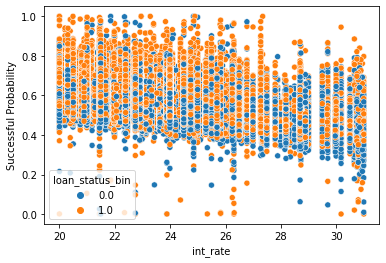

In [46]:
sns.scatterplot(data=rate_v_prob, x='int_rate', y='Successful Probability', hue='loan_status_bin');

In [69]:
rate_v_prob[rate_v_prob['Successful Probability'] > 0.8].describe()

,int_rate,Successful Probability,loan_status_bin
count,1208.000000,1208.000000,1208.000000
mean,21.950397,0.836907,0.823675
std,1.942211,0.042328,0.381254
min,20.000000,0.800040,0.000000
25%,20.390000,0.809238,1.000000
50%,21.450000,0.822113,1.000000
75%,22.740000,0.847093,1.000000
max,30.840000,1.000000,1.000000


In [73]:
rate_v_prob[(rate_v_prob.loan_status_bin==0) & (rate_v_prob['Successful Probability'] > 0.8)]

,int_rate,Successful Probability,loan_status_bin
631,20.99,0.806824,0.0
702,21.99,0.898767,0.0
3387,20.99,0.845570,0.0
3860,20.99,0.800253,0.0
7397,20.99,0.899410,0.0
...,...,...,...
108180,24.74,0.830151,0.0
108212,22.74,0.968364,0.0
108216,21.49,0.842049,0.0
108357,21.49,0.860970,0.0


In [75]:
d = unscaled[(unscaled['loan_status_bin']==0) & (unscaled['Successful Probability']>0.8)]
d

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,loan_status_bin,pub_rec,term,grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Successful Probability
631,6000.0,20.99,226.02,139000.0,0.02,670.0,0.0,0.0,0,1,2,0,0,1,0,1,0,0,0,0,0.806824
702,14000.0,21.99,386.59,600000.0,3.89,675.0,0.0,0.0,1,2,6,0,1,0,0,0,0,0,1,0,0.898767
3387,2550.0,20.99,96.06,90000.0,9.16,765.0,0.0,0.0,0,1,11,0,1,0,0,1,0,0,0,0,0.845570
3860,28000.0,20.99,757.34,300000.0,4.68,715.0,0.0,0.0,1,1,11,0,1,0,0,0,0,0,1,0,0.800253
7397,32225.0,20.99,871.62,511161.0,1.03,700.0,0.0,1.0,1,1,11,0,1,0,0,1,0,0,0,0,0.899410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108180,10000.0,24.74,292.00,479484.0,2.29,670.0,0.0,0.0,1,1,5,0,1,0,0,0,0,0,0,1,0.830151
108212,30000.0,22.74,841.24,900000.0,1.99,700.0,0.0,1.0,1,1,10,0,1,0,0,1,0,0,0,0,0.968364
108216,8000.0,21.49,303.42,147000.0,7.19,675.0,0.0,0.0,0,0,6,1,0,0,0,1,0,0,0,0,0.842049
108357,4800.0,21.49,182.06,43000.0,4.80,770.0,0.0,0.0,0,0,11,1,0,0,0,1,0,0,0,0,0.860970


/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_17680/1371494595.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()             # <==================== here!


<Figure size 432x288 with 0 Axes>

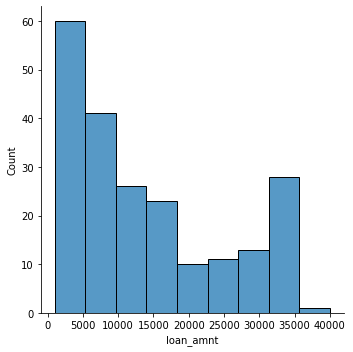

<Figure size 432x288 with 0 Axes>

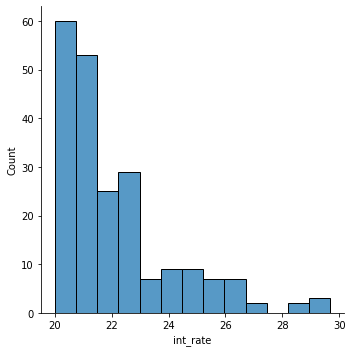

<Figure size 432x288 with 0 Axes>

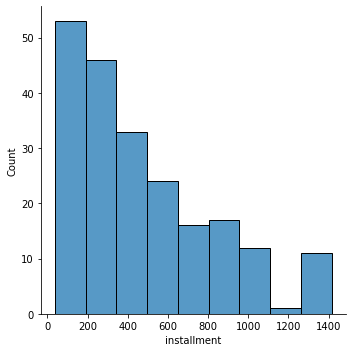

<Figure size 432x288 with 0 Axes>

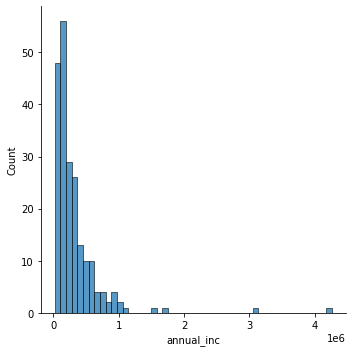

<Figure size 432x288 with 0 Axes>

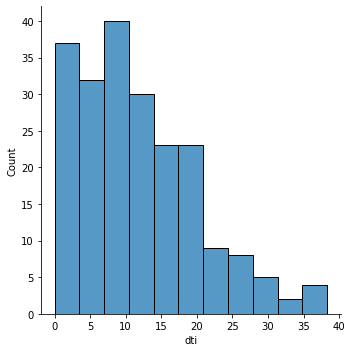

<Figure size 432x288 with 0 Axes>

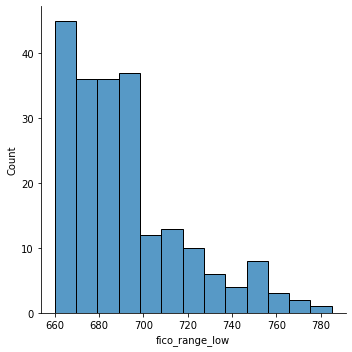

<Figure size 432x288 with 0 Axes>

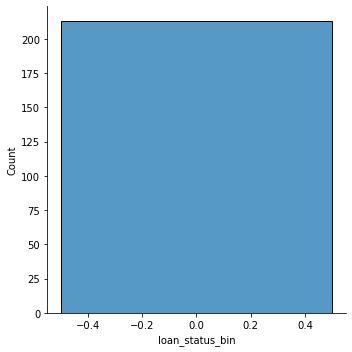

<Figure size 432x288 with 0 Axes>

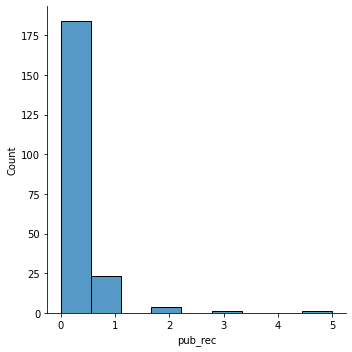

<Figure size 432x288 with 0 Axes>

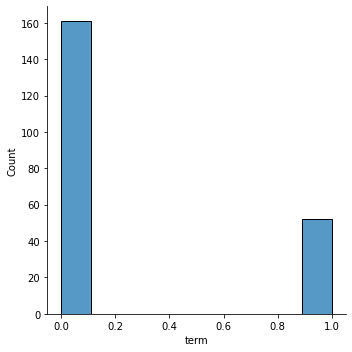

<Figure size 432x288 with 0 Axes>

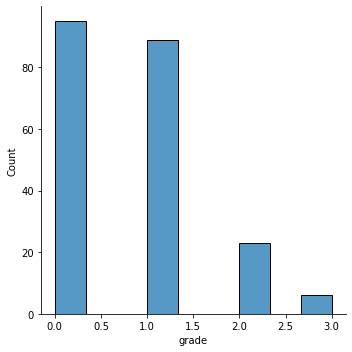

<Figure size 432x288 with 0 Axes>

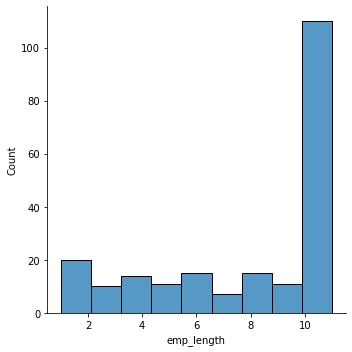

<Figure size 432x288 with 0 Axes>

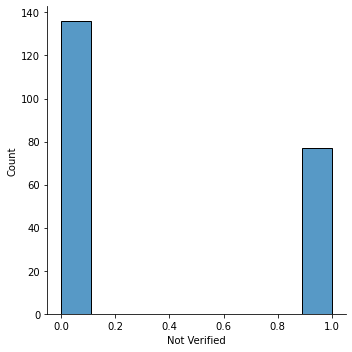

<Figure size 432x288 with 0 Axes>

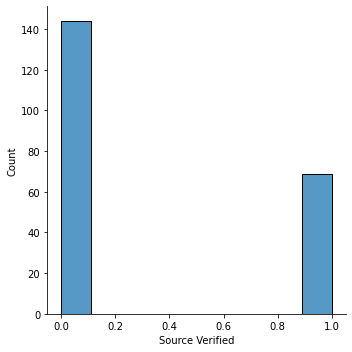

<Figure size 432x288 with 0 Axes>

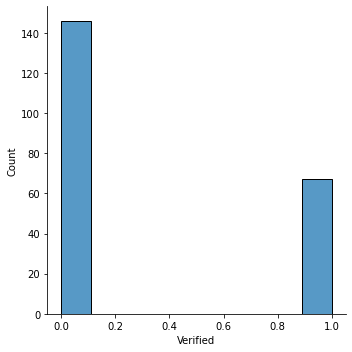

<Figure size 432x288 with 0 Axes>

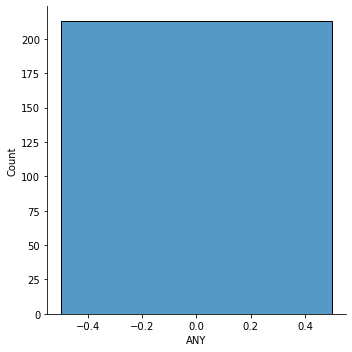

<Figure size 432x288 with 0 Axes>

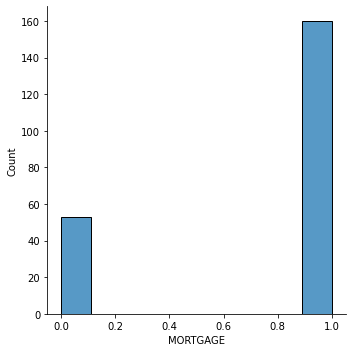

<Figure size 432x288 with 0 Axes>

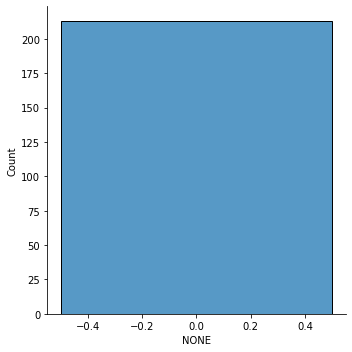

<Figure size 432x288 with 0 Axes>

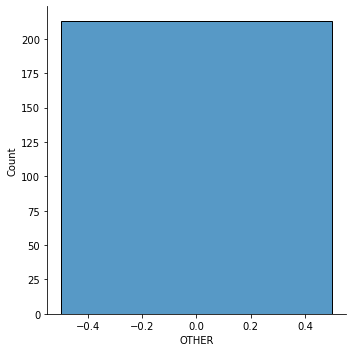

<Figure size 432x288 with 0 Axes>

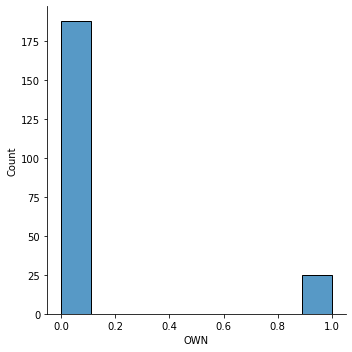

<Figure size 432x288 with 0 Axes>

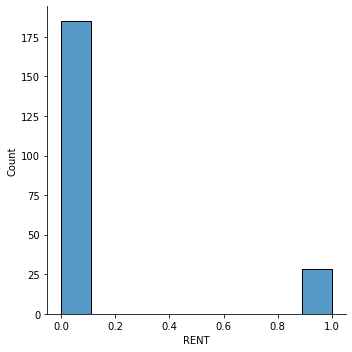

<Figure size 432x288 with 0 Axes>

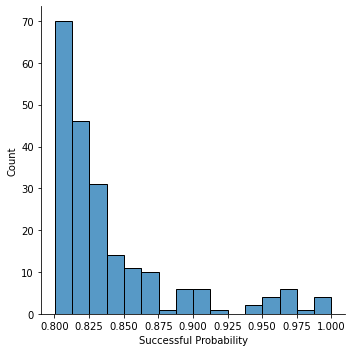

In [78]:
# create distplots
for column in d.columns:
    plt.figure()             # <==================== here!
    sns.displot(d[column]);

In [81]:
d2 = verified_unscaled[(verified_unscaled['loan_status_bin']==0) & (verified_unscaled['Successful Probability']>0.8)]
d2

KeyError: 'Successful Probability'

In [ ]:
# create distplots
for column in verified_unscaled.columns:
    plt.figure()             # <==================== here!
    sns.displot(d[column]);

In [ ]:
y_pred = (y_pred[:, 1] > threshold).astype('float')

In [14]:
steps = [('model', lr)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [15]:
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [17]:
len(y_pred)

110074

In [20]:
y_pred

array([[0.36216196, 0.63783804],
       [0.40053507, 0.59946493],
       [0.36612899, 0.63387101],
       ...,
       [0.30416421, 0.69583579],
       [0.34883961, 0.65116039],
       [0.30814722, 0.69185278]])

In [6]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]

In [7]:
X_array = X.iloc[:,0:].values
X_array

array([[ 0.19627602],
       [ 0.19627602],
       [-0.57588288],
       ...,
       [ 0.19627602],
       [ 0.19627602],
       [ 0.19627602]])

In [8]:
y_array = y.to_numpy()
y_array

array([0., 0., 0., ..., 1., 0., 1.])

In [10]:
#Obtaining optimal mean threshold value via StratifiedKFold: 

lrt = LogisticRegressionWithThreshold()
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

thresholds = []

for train_index, test_index in rskf.split(X,y):
    lrt.fit(X_array[train_index], y_array[train_index])
    threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_array[train_index], y_array[train_index])
    thresholds.append(round(threshold,5))
    
print (thresholds)
optimal = np.mean(thresholds)
print(optimal)

[0.20135, 0.2015, 0.20138, 0.20139, 0.20134]
0.20139200000000002


In [11]:
steps = [('model', lrt)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [12]:
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [13]:
y_pred

array([[0.79850161, 0.20149839],
       [0.79860692, 0.20139308],
       [0.86595566, 0.13404434],
       ...,
       [0.79862405, 0.20137595],
       [0.79864786, 0.20135214],
       [0.79860692, 0.20139308]])

In [14]:
#Obtaining classification based on desired threshold: 

threshold = optimal
y_pred = (y_pred[:, 1] > threshold).astype('float')
#confusion_matrix(y_test, y_pred)

In [15]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[738907, 337844],
       [118216, 150343]])

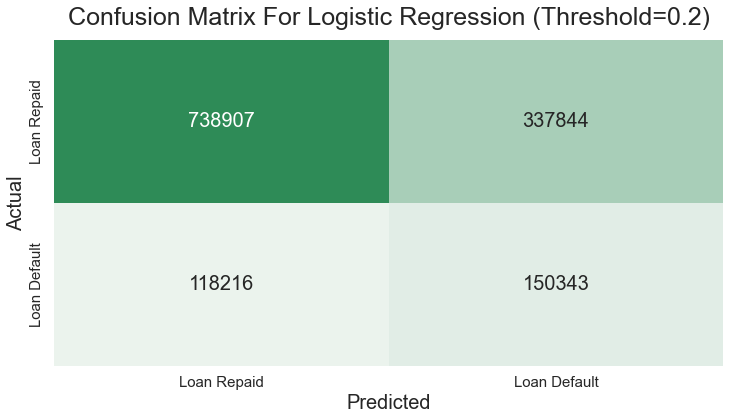

In [16]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression (Threshold=0.2)', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [18]:
accuracy_score(y, y_pred)

0.661000066899079

In [17]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

150343
337844
118216
738907
0.661000066899079


In [19]:
#Basic Metrics I ~ True Positive Rate
#1. True Positive Rate (=Recall or Sensitivity) = TP / (TP + FN)
TPR = TP / (TP+FN)
TPR

0.5598136722284489

In [21]:
#Basic Metrics II ~ Precision
#2. Precision = TP / (TP + FP)
Precision = TP / (TP + FP)
Precision

0.3079619080393374

In [28]:
#Experimenting with Threshold @ 0.18: 

y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

threshold = 0.18
y_pred = (y_pred[:, 1] > threshold).astype('float')
#confusion_matrix(y_test, y_pred)

In [29]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[561061, 515690],
       [ 66770, 201789]])

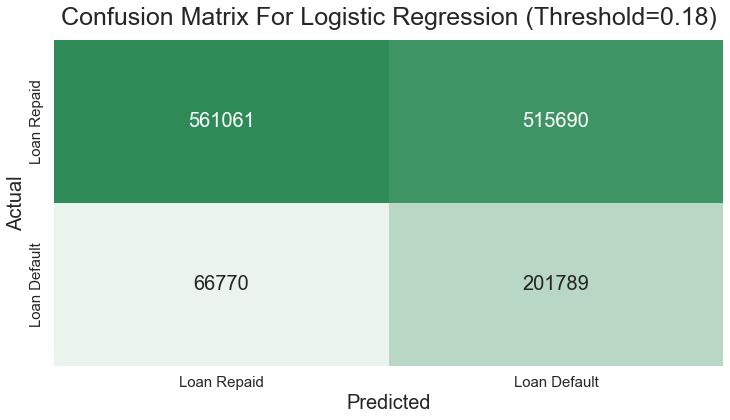

In [35]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression (Threshold=0.18)', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [31]:
accuracy_score(y, y_pred)

0.5670440270272279

In [32]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

201789
515690
66770
561061
0.5670440270272279


In [33]:
#Basic Metrics I ~ True Positive Rate
#1. True Positive Rate (=Recall or Sensitivity) = TP / (TP + FN)
TPR = TP / (TP+FN)
TPR

0.7513767924366713

In [34]:
#Basic Metrics II ~ Precision
#2. Precision = TP / (TP + FP)
Precision = TP / (TP + FP)
Precision

0.28124725601724926

In [38]:
#Experimenting with Threshold @ 0.12: 

y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

threshold = 0.12
y_pred = (y_pred[:, 1] > threshold).astype('float')
#confusion_matrix(y_test, y_pred)

In [39]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[220889, 855862],
       [ 14201, 254358]])

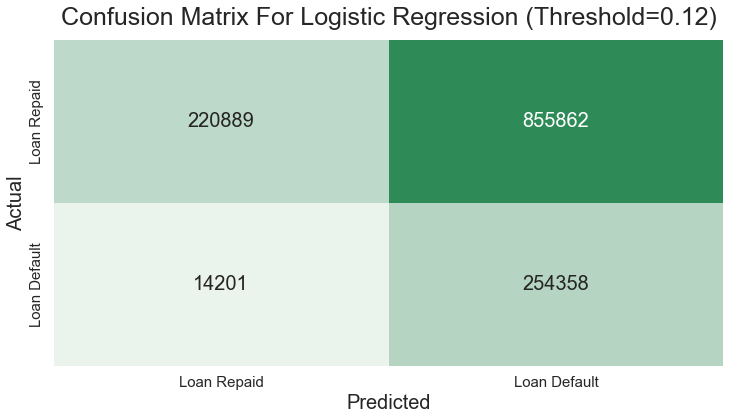

In [40]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression (Threshold=0.12)', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [41]:
accuracy_score(y, y_pred)

0.35326207342545585

In [42]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

254358
855862
14201
220889
0.35326207342545585


In [43]:
#Basic Metrics I ~ True Positive Rate
#1. True Positive Rate (=Recall or Sensitivity) = TP / (TP + FN)
TPR = TP / (TP+FN)
TPR

0.9471214891327417

In [44]:
#Basic Metrics II ~ Precision
#2. Precision = TP / (TP + FP)
Precision = TP / (TP + FP)
Precision

0.22910594296625894

In [ ]:
## Not able to get desired results with class and definitions below....am doing it manually above. 

In [22]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]
    
    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]
        
    def threshold_from_desired_precision(self, X, y, desired_precision=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_precision_idx = np.argmax(precisions >= desired_precision)
        
        return thresholds[desired_precision_idx], recalls[desired_precision_idx]

    def threshold_from_desired_recall(self, X, y, desired_recall=0.9):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        desired_recall_idx = np.argmin(recalls >= desired_recall)
        
        return thresholds[desired_recall_idx], precisions[desired_recall_idx]

In [26]:
#Obtaining optimal mean threshold value via StratifiedKFold: 

lrt = LogisticRegressionWithThreshold()
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

thresholds = []
precisions = []

for train_index, test_index in rskf.split(X,y):
    lrt.fit(X_array[train_index], y_array[train_index])
    threshold, precision = lrt.threshold_from_desired_recall(X_array[train_index], y_array[train_index])
    thresholds.append(round(threshold,5))
    precisions.append(round(threshold,5))
    
print (thresholds)
optimal = np.mean(thresholds)
print(optimal)
print()
print(precisions)

[0.20135, 0.2015, 0.20138, 0.20139, 0.20134]
0.20139200000000002

[0.20135, 0.2015, 0.20138, 0.20139, 0.20134]


In [24]:
precision

0.2813353539576366

In [6]:
lr1 = LogisticRegression()

In [7]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [8]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.7981692  0.79787187 0.79770462 0.79836246 0.79828441]
0.7980785097858487


In [9]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[1054612,   22139],
       [ 249508,   19051]])

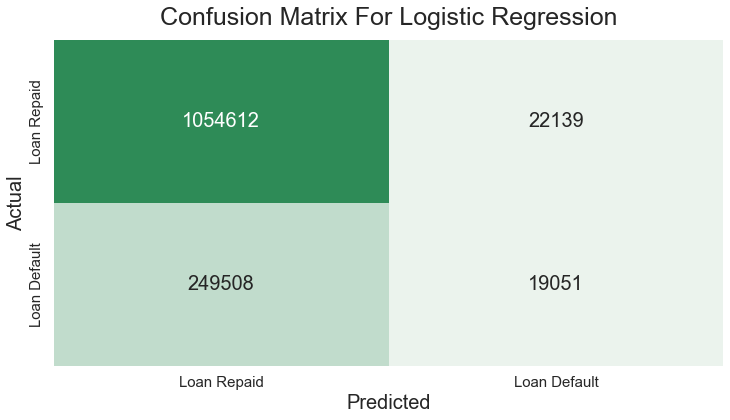

In [10]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [11]:
accuracy_score(y, y_pred)

0.7980785097858486

In [12]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

19051
22139
249508
1054612
0.7980785097858486


In [13]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Fully Paid
#1 = Loan Defaulted

good_loan = data.loan_status_bin.value_counts()[0]
bad_loan = data.loan_status_bin.value_counts()[1]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment into accepted loans would give us 80% chance of pickkng a good loan

0.0    1076751
1.0     268559
Name: loan_status_bin, dtype: int64

0.8003738915194267


In [14]:
#Negative Predictive Value
#Logistic model does not do better than Null Model (or Randomly choosing an investment)
TN / (TN + FN)

0.8086771156028586

In [15]:
#Basic Metrics I ~ True Positive Rate
#1. True Positive Rate (=Recall or Sensitivity) = TP / (TP + FN)
TPR = TP / (TP+FN)
TPR

0.07093785723062716

In [16]:
#Cross Checking Recall from Model:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1) 

print(scores)
score = np.mean(scores)
print(score)

[0.07099104 0.07102696 0.07030086 0.07167858 0.07069184]
0.07093785742867391


In [17]:
#Basic Metrics II ~ False Positive Rate
#2. False Postive Rate = FP / (FP + TN)
FPR = FP / (FP + TN)
FPR

0.02056092819974163

In [18]:
#Part II - Experimenting with Different Thresholds ~ Optimal TPR - FPR: 

In [19]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [20]:
X_array = X.iloc[:,0:].values
X_array

array([[ 0.19627602],
       [ 0.19627602],
       [-0.57588288],
       ...,
       [ 0.19627602],
       [ 0.19627602],
       [ 0.19627602]])

In [21]:
X_array = X.to_numpy()
X_array

array([[ 0.19627602],
       [ 0.19627602],
       [-0.57588288],
       ...,
       [ 0.19627602],
       [ 0.19627602],
       [ 0.19627602]])

In [22]:
len(X_array)

1345310

In [23]:
y_array = y.to_numpy()
y_array

array([0., 0., 0., ..., 1., 0., 1.])

In [9]:
#Obtaining optimal mean threshold value via StratifiedKFold: 

lrt = LogisticRegressionWithThreshold()
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

thresholds = []

for train_index, test_index in rskf.split(X,y):
    lrt.fit(X_array[train_index], y_array[train_index])
    threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_array[train_index], y_array[train_index])
    thresholds.append(round(threshold,5))
    
print (thresholds)
optimal = np.mean(thresholds)
print(optimal)

[0.20135, 0.2015, 0.20138, 0.20139, 0.20134]
0.20139200000000002


In [25]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [26]:
y_pred2 = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [27]:
len(y_pred2)

1345310

In [28]:
y_pred2

array([[0.79850161, 0.20149839],
       [0.79860692, 0.20139308],
       [0.86595566, 0.13404434],
       ...,
       [0.79862405, 0.20137595],
       [0.79864786, 0.20135214],
       [0.79860692, 0.20139308]])

In [29]:
#Obtaining classification based on desired threshold: 

threshold = optimal
y_pred2 = (y_pred2[:, 1] > threshold).astype('float')
#confusion_matrix(y_test, y_pred)

In [30]:
y_pred2

array([1., 1., 0., ..., 0., 0., 1.])

In [31]:
len(y_pred2)

1345310

In [32]:
conf_mat2 = confusion_matrix(y, y_pred2)
conf_mat2

array([[738907, 337844],
       [118216, 150343]])

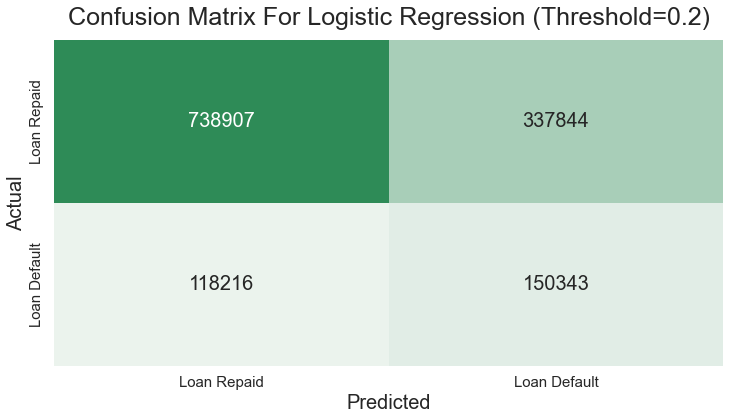

In [33]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat2, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)
res.set_yticklabels(['Loan Repaid', 'Loan Default'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression (Threshold=0.2)', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [34]:
accuracy_score(y, y_pred2)

0.661000066899079

In [35]:
TN, FP, FN, TP = conf_mat2.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

150343
337844
118216
738907
0.661000066899079


In [37]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Fully Paid
#1 = Loan Defaulted

good_loan = data.loan_status_bin.value_counts()[0]
bad_loan = data.loan_status_bin.value_counts()[1]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment into accepted loans would give us 80% chance of pickkng a good loan

0.0    1076751
1.0     268559
Name: loan_status_bin, dtype: int64

0.8003738915194267


In [36]:
#Negative Predictive Value
#Logistic with adjusted threshold of 0.2 does BETTER than Null Model (or Randomly choosing an investment)
TN / (TN + FN)

0.8620781381435336

In [38]:
#Basic Metrics I ~ True Positive Rate
#1. True Positive Rate (=Recall or Sensitivity) = TP / (TP + FN)
TPR = TP / (TP+FN)
TPR

0.5598136722284489

In [41]:
#Basic Metrics II ~ False Positive Rate
#2. False Postive Rate = FP / (FP + TN)
FPR = FP / (FP + TN)
FPR

0.313762420466756

In [45]:
X_array = X.iloc[:,0:].values
X_array

array([[ 0.19627602],
       [ 0.19627602],
       [-0.57588288],
       ...,
       [ 0.19627602],
       [ 0.19627602],
       [ 0.19627602]])

In [46]:
y_array = y.to_numpy()
y_array

array([0., 0., 0., ..., 1., 0., 1.])

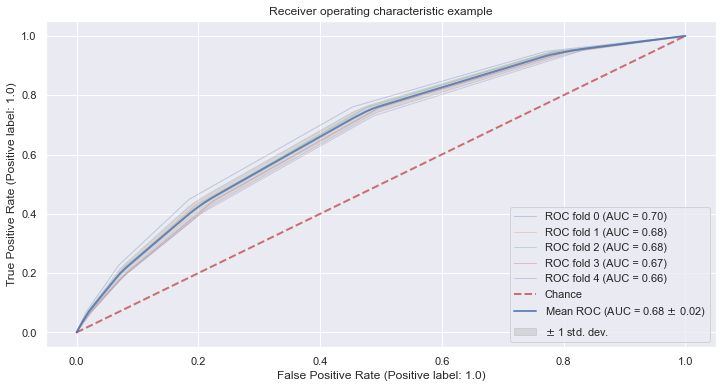

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_array, y_array)):
    classifier.fit(X_array[train], y_array[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_array[test],
        y_array[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [ ]:
#diff between stratified kfold and repeated stratified kfold? 